In [15]:
import urllib.request
import requests, io, os
import numpy as np
import tarfile, zipfile, gzip

In [38]:
def unzip_from_UCI(UCI_url, dest=''):
    """ download and extract the zipped UCI datasets"""
    response = requests.get(UCI_url)
    compressed_file = io.BytesIO(response.content)
    z = zipfile.ZipFile(compressed_file)
    print('Extracting in %s' % os.getcwd() + '/'+ dest)
    for name in z.namelist():
        if '.csv' in name:
            print('\tunzipping %s' %name)
            z.extract(name, path=os.getcwd()+'/'+ dest)

In [39]:
def gzip_from_UCI(UCI_url, dest=''):
    """ download and extract the gziped UCI datasets"""
    response = urllib.request.urlopen(UCI_url)
    compressed_file = io.ByteIO(response.read())
    decompressed_file = gzip.GzipFile(fileobj = compressed_file)
    filename = UCI_url.split('/')[-1][:-3]
    with open(os.getcwd()+'/'+filename, 'wb') as outfile:
        outfile.write(decompressed_file.read())
        print('File %s decompress' % filename)

In [40]:
def tarzip_from_UCI(UCI_url, dest='.'):
    """ download and extract tar.gz UCI datasets"""
    response = urllib.request.urlopen(UCI_url)
    compressed_file = io.StringIO.StringIO(response.read())
    tar = tarfile.open(mode="r:gz", fileobj = compressed_file)
    tar.extractall(path=dest)
    datasets = tar.getnames()
    for dataset in datasets:
        size = os.path.getsize(dest+'/'+datasets)
        print('File %s is %i bytes' % (dataset, size))
    tar.close()


In [41]:
def load_matrix(UCI_url):
    """ download and extract as matrix"""
    return np.loadtxt(urllib.request.urlopen(UCI_url))

In [42]:
UCI_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
unzip_from_UCI(UCI_url, dest='bikesharing')

Extracting in /Users/byungsagkim/opt/python/bikesharing
	unzipping day.csv
	unzipping hour.csv


In [46]:
import os, csv
local_path = os.getcwd()
source = 'bikesharing/hour.csv'
SEP = ','
with open(local_path+'/'+source, 'r') as R:
    iterator = csv.reader(R, delimiter=SEP)
    for n, row in enumerate(iterator):
        if n==0:
            header = row
        else:
            pass
    print('Total rows: %i' % (n+1))
    print('Header: %s' % ', '.join(header))
    print('Sample values: %s' % ', '.join(row))

Total rows: 17380
Header: instant, dteday, season, yr, mnth, hr, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt
Sample values: 17379, 2012-12-31, 1, 1, 12, 23, 0, 1, 1, 1, 0.26, 0.2727, 0.65, 0.1343, 12, 37, 49


In [48]:
import pandas as pd
CHUNK_SIZE = 1000
with open(local_path+'/'+source,'r') as R:
    iterator = pd.read_csv(R, chunksize=CHUNK_SIZE)
    for n, data_chunk in enumerate(iterator):
        print('Size of uploaded chunk: %i instances, %i features' % (data_chunk.shape))
        pass
    print('Sample values: \n%s' % str(data_chunk.iloc[0]))

Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 1000 instances, 17 features
Size of uploaded chunk: 379 instances, 17 features
Sample values: 
instant            17001
dteday        2012-12-16

In [52]:
import os, csv
local_path = os.getcwd()
source = 'bikesharing/hour.csv'
SEP = ','
running_mean = list()
running_std = list()
with open(local_path+'/'+source, 'r') as R:
    iterator = csv.DictReader(R, delimiter=SEP)
    x = 0.0
    x_squared = 0.0
    for n, row in enumerate(iterator):
        temp = float(row['temp'])
        if n == 0:
            max_x, min_x = temp, temp
        else:
            max_x,min_x = max(temp, max_x), min(temp, min_x)
        x += temp
        x_squared += temp**2
        running_mean.append(x/(n+1))
        running_std.append(((x_squared - (x**2)/(n+1))/(n+1))**0.5)
        pass
    print('Total rows: %i' % (n+1))
    print('Feature \'temp\': mean=%0.3f, max=%0.3f, min=%0.3f, sd=%0.3f' \
         % (running_mean[-1], max_x, min_x, running_std[-1]))
    

Total rows: 17379
Feature 'temp': mean=0.497, max=1.000, min=0.020, sd=0.193


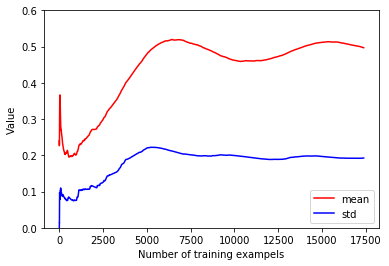

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(running_mean, 'r-', label='mean')
plt.plot(running_std, 'b-', label='std')
plt.ylim(0.0,0.6)
plt.xlabel('Number of training exampels')
plt.ylabel('Value')
plt.legend(loc='lower right', numpoints=1)
plt.show()
